# 1. Setup Binance Account



In [5]:
apikey = 'YOURAPIKEY'
secret = 'YOURSECRET'

In [6]:
!pip install python-binance pandas mplfinance

In [6]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

# 2. Authenticate

In [7]:
client = Client(apikey, secret)

# 3. Get Tickers

In [9]:
tickers = client.get_all_tickers()

In [10]:
tickers

[{'symbol': 'ETHBTC', 'price': '0.07844900'},
 {'symbol': 'LTCBTC', 'price': '0.00255400'},
 {'symbol': 'BNBBTC', 'price': '0.01318100'},
 {'symbol': 'NEOBTC', 'price': '0.00046800'},
 {'symbol': 'QTUMETH', 'price': '0.00213000'},
 {'symbol': 'EOSETH', 'price': '0.00072500'},
 {'symbol': 'SNTETH', 'price': '0.00001816'},
 {'symbol': 'BNTETH', 'price': '0.00030700'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00012670'},
 {'symbol': 'BNBETH', 'price': '0.16790000'},
 {'symbol': 'BTCUSDT', 'price': '23898.07000000'},
 {'symbol': 'ETHUSDT', 'price': '1874.90000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001249'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [16]:
tickers[5]['price']

'0.00072500'

In [17]:
ticker_df = pd.DataFrame(tickers)

In [18]:
ticker_df.head()

,symbol,price
0,ETHBTC,0.07844900
1,LTCBTC,0.00255400
2,BNBBTC,0.01318100
3,NEOBTC,0.00046800
4,QTUMETH,0.00213000


In [19]:
ticker_df.tail(10)

,symbol,price
2074,LEVERBUSD,0.00308000
2075,BURGERETH,0.00083600
2076,PEOPLEETH,0.00001491
2077,UNFIETH,0.00689100
2078,BONDETH,0.00439700
2079,STORJTRY,12.57000000
2080,OPETH,0.00077000
2081,ETCTRY,718.60000000
2082,WINGETH,0.00746600
2083,FILETH,0.00441600


In [20]:
ticker_df.set_index('symbol', inplace = True)

In [33]:
ticker_df.head()

,price
symbol,
ETHBTC,0.07844900
LTCBTC,0.00255400
BNBBTC,0.01318100
NEOBTC,0.00046800
QTUMETH,0.00213000


In [21]:
float(ticker_df.loc['ETHBTC']['price'])

0.078449

In [22]:
float(ticker_df.loc['BTCUSDT']['price'])

23898.07

In [34]:
ticker_df['price'] = ticker_df['price'].apply(pd.to_numeric)

In [38]:
ticker_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2084 entries, ETHBTC to FILETH
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2084 non-null   float64
dtypes: float64(1)
memory usage: 97.1+ KB


# 4. Get Depth

In [39]:
depth = client.get_order_book(symbol='ETHUSDT')

In [40]:
depth

{'lastUpdateId': 19388998119,
 'bids': [['1881.28000000', '61.90110000'],
  ['1881.27000000', '0.01140000'],
  ['1881.21000000', '0.15950000'],
  ['1881.12000000', '2.32710000'],
  ['1881.11000000', '3.62230000'],
  ['1881.09000000', '1.13120000'],
  ['1881.08000000', '2.09060000'],
  ['1881.02000000', '0.45030000'],
  ['1881.00000000', '7.98110000'],
  ['1880.99000000', '8.21180000'],
  ['1880.97000000', '0.50000000'],
  ['1880.94000000', '1.32900000'],
  ['1880.93000000', '5.17880000'],
  ['1880.91000000', '0.74800000'],
  ['1880.87000000', '0.29800000'],
  ['1880.86000000', '2.15500000'],
  ['1880.81000000', '2.00000000'],
  ['1880.80000000', '4.05760000'],
  ['1880.79000000', '1.64990000'],
  ['1880.78000000', '2.66150000'],
  ['1880.73000000', '1.46200000'],
  ['1880.72000000', '3.39910000'],
  ['1880.71000000', '2.95760000'],
  ['1880.70000000', '2.65840000'],
  ['1880.65000000', '4.00000000'],
  ['1880.61000000', '6.40000000'],
  ['1880.59000000', '9.07030000'],
  ['1880.5700000

In [41]:
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['Price', 'Volume']
depth_df.head()

,Price,Volume
0,1881.29000000,5.38760000
1,1881.36000000,2.41430000
2,1881.37000000,6.03390000
3,1881.40000000,0.02060000
4,1881.41000000,0.02280000


In [42]:
depth_df.dtypes

Price     object
Volume    object
dtype: object

In [43]:
depth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   100 non-null    object
 1   Volume  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


# 5. Get Historical Data

In [44]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

In [69]:
client.get_historical_klines??

In [46]:
historical = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_1DAY, '1 Jan 2011')

In [32]:
historical[0:9]

[[1502668800000,
  '4261.48000000',
  '4485.39000000',
  '3850.00000000',
  '4086.29000000',
  '2843.43142600',
  1503273599999,
  '12021576.48265154',
  13134,
  '2240.24924000',
  '9482742.92094674',
  '0'],
 [1503273600000,
  '4069.13000000',
  '4453.91000000',
  '3400.00000000',
  '4310.01000000',
  '4599.39662900',
  1503878399999,
  '18978983.50987317',
  37826,
  '1755.53026500',
  '7173180.19744751',
  '0'],
 [1503878400000,
  '4310.01000000',
  '4939.19000000',
  '4124.54000000',
  '4509.08000000',
  '4753.84337600',
  1504483199999,
  '21581679.92866748',
  35717,
  '1371.03442800',
  '6237542.20612072',
  '0'],
 [1504483200000,
  '4505.00000000',
  '4788.59000000',
  '3603.00000000',
  '4130.37000000',
  '6382.78774500',
  1505087999999,
  '27307824.36893929',
  42372,
  '2821.42273900',
  '12120979.77068529',
  '0'],
 [1505088000000,
  '4153.62000000',
  '4394.59000000',
  '2817.00000000',
  '3699.99000000',
  '8106.70512700',
  1505692799999,
  '30026796.42861788',
  50423

In [48]:
hist_df = pd.DataFrame(historical)

In [49]:
hist_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1502928000000,301.13000000,312.18000000,298.00000000,302.00000000,7030.71034000,1503014399999,2154655.30035660,4522,6224.58999000,1908705.36853020,0
1,1503014400000,302.00000000,311.79000000,283.94000000,293.96000000,9537.84646000,1503100799999,2858946.50935390,5658,7452.43542000,2240813.26122640,0
2,1503100800000,293.31000000,299.90000000,278.00000000,290.91000000,2146.19773000,1503187199999,620022.58986170,1795,1537.97550000,444713.61220860,0
3,1503187200000,289.41000000,300.53000000,282.85000000,299.10000000,2510.13871000,1503273599999,742847.89455990,2038,2186.68739000,647506.06202050,0
4,1503273600000,299.10000000,346.52000000,294.60000000,323.29000000,5219.44542000,1503359999999,1689472.34121400,3925,4004.19967000,1297977.42311420,0
5,1503360000000,321.04000000,330.41000000,144.21000000,309.80000000,7956.35088000,1503446399999,2454425.80331370,6577,4433.78132000,1364472.48833300,0
6,1503446400000,312.25000000,324.99000000,309.41000000,315.74000000,8665.72569000,1503532799999,2753464.94504080,8540,2282.23633000,728206.91761490,0
7,1503532800000,315.74000000,328.04000000,314.01000000,323.42000000,6753.27192000,1503619199999,2159417.11415370,6495,1901.90029000,610929.14716790,0
8,1503619200000,323.42000000,338.28000000,323.42000000,327.24000000,7125.96962000,1503705599999,2354162.03829400,7452,2595.82561000,859314.68351840,0
9,1503705600000,327.24000000,335.44000000,323.41000000,330.79000000,4877.68521000,1503791999999,1601994.37731660,4400,941.99655000,311132.26310030,0


In [50]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [51]:
hist_df.tail(10)

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1816,1659830400000,1690.60000000,1729.79000000,1668.00000000,1700.19000000,439904.76400000,1659916799999,745750151.38208700,692491,226220.14160000,383519031.53658200,0
1817,1659916800000,1700.20000000,1818.00000000,1693.87000000,1777.05000000,781620.54430000,1660003199999,1379905145.70302100,987727,403146.57800000,711839570.83093400,0
1818,1660003200000,1777.05000000,1790.83000000,1667.93000000,1702.76000000,818171.10190000,1660089599999,1406671817.08567300,1062267,398475.05390000,684898876.00059700,0
1819,1660089600000,1702.76000000,1885.00000000,1656.78000000,1853.57000000,1317767.51270000,1660175999999,2346974815.06705600,1590681,685632.88560000,1223921617.95825900,0
1820,1660176000000,1853.58000000,1942.00000000,1850.32000000,1880.19000000,1105261.90090000,1660262399999,2093718964.80063200,1324999,571243.89190000,1082235762.98020600,0
1821,1660262400000,1880.19000000,1964.71000000,1853.06000000,1958.28000000,717628.10150000,1660348799999,1363895150.81011300,1027178,365935.01700000,695903467.37316700,0
1822,1660348800000,1958.28000000,2020.00000000,1946.50000000,1983.55000000,695876.02930000,1660435199999,1382235354.29249100,940869,359352.47120000,713880075.11279600,0
1823,1660435200000,1983.55000000,2030.00000000,1906.00000000,1935.31000000,569583.48520000,1660521599999,1122186881.22395100,856767,284978.81080000,561687887.38430400,0
1824,1660521600000,1935.32000000,2012.47000000,1872.31000000,1899.06000000,949162.33050000,1660607999999,1824203091.99566700,1295615,470951.53290000,905389296.66333500,0
1825,1660608000000,1899.05000000,1915.00000000,1853.00000000,1881.12000000,577345.04340000,1660694399999,1087836218.42057600,834183,282986.25920000,533320699.93182800,0


In [53]:
hist_df.shape

(1826, 12)

In [55]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

# 6. Preprocess Historical Data

In [56]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [15]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [58]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [59]:
hist_df.tail(10)

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1816,2022-08-07,1690.60,1729.79,1668.00,1700.19,4.399048e+05,2022-08-07 23:59:59.999000064,7.457502e+08,692491,226220.1416,3.835190e+08,0
1817,2022-08-08,1700.20,1818.00,1693.87,1777.05,7.816205e+05,2022-08-08 23:59:59.999000064,1.379905e+09,987727,403146.5780,7.118396e+08,0
1818,2022-08-09,1777.05,1790.83,1667.93,1702.76,8.181711e+05,2022-08-09 23:59:59.999000064,1.406672e+09,1062267,398475.0539,6.848989e+08,0
1819,2022-08-10,1702.76,1885.00,1656.78,1853.57,1.317768e+06,2022-08-10 23:59:59.999000064,2.346975e+09,1590681,685632.8856,1.223922e+09,0
1820,2022-08-11,1853.58,1942.00,1850.32,1880.19,1.105262e+06,2022-08-11 23:59:59.999000064,2.093719e+09,1324999,571243.8919,1.082236e+09,0
1821,2022-08-12,1880.19,1964.71,1853.06,1958.28,7.176281e+05,2022-08-12 23:59:59.999000064,1.363895e+09,1027178,365935.0170,6.959035e+08,0
1822,2022-08-13,1958.28,2020.00,1946.50,1983.55,6.958760e+05,2022-08-13 23:59:59.999000064,1.382235e+09,940869,359352.4712,7.138801e+08,0
1823,2022-08-14,1983.55,2030.00,1906.00,1935.31,5.695835e+05,2022-08-14 23:59:59.999000064,1.122187e+09,856767,284978.8108,5.616879e+08,0
1824,2022-08-15,1935.32,2012.47,1872.31,1899.06,9.491623e+05,2022-08-15 23:59:59.999000064,1.824203e+09,1295615,470951.5329,9.053893e+08,0
1825,2022-08-16,1899.05,1915.00,1853.00,1881.12,5.773450e+05,2022-08-16 23:59:59.999000064,1.087836e+09,834183,282986.2592,5.333207e+08,0


In [60]:
hist_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [62]:
hist_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,1826.000000,1826.000000,1826.000000,1826.000000,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03
mean,1071.251298,1109.895263,1026.225356,1072.116774,5.710103e+05,6.981352e+08,5.118916e+05,2.856948e+05,3.481994e+08
std,1214.125286,1253.060712,1167.903988,1214.158566,5.210383e+05,1.038597e+09,5.908529e+05,2.584053e+05,5.157887e+08
min,83.750000,85.000000,81.790000,83.760000,1.060567e+03,3.027397e+05,1.431000e+03,5.666464e+02,1.561580e+05
25%,209.625000,215.317500,202.670000,209.632500,2.162607e+05,5.644886e+07,1.206245e+05,1.098741e+05,2.853657e+07
50%,402.955000,418.040000,386.070000,404.225000,4.430198e+05,1.415393e+08,2.343475e+05,2.231604e+05,7.070071e+07
75%,1792.232500,1840.902500,1724.750000,1793.167500,7.670211e+05,1.249753e+09,8.133565e+05,3.817947e+05,6.256344e+08
max,4807.980000,4868.000000,4713.890000,4807.980000,4.663240e+06,1.164152e+10,5.548968e+06,2.314458e+06,5.659753e+09


In [63]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           1826 non-null   datetime64[ns]
 1   Open                1826 non-null   float64       
 2   High                1826 non-null   float64       
 3   Low                 1826 non-null   float64       
 4   Close               1826 non-null   float64       
 5   Volume              1826 non-null   float64       
 6   Close Time          1826 non-null   datetime64[ns]
 7   Quote Asset Volume  1826 non-null   float64       
 8   Number of Trades    1826 non-null   int64         
 9   TB Base Volume      1826 non-null   float64       
 10  TB Quote Volume     1826 non-null   float64       
 11  Ignore              1826 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 171.3+ KB


# 7. Viz

In [18]:
import mplfinance as mpf

In [65]:
hist_df.set_index('Close Time').tail(100)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2022-05-09 23:59:59.999000064,2022-05-09,2519.71,2530.78,2225.00,2228.55,1.574925e+06,3.725677e+09,1758980,7.852872e+05,1.857342e+09,0
2022-05-10 23:59:59.999000064,2022-05-10,2229.00,2457.34,2200.00,2342.05,1.550626e+06,3.650912e+09,1851225,7.700891e+05,1.814102e+09,0
2022-05-11 23:59:59.999000064,2022-05-11,2342.04,2451.37,2005.00,2084.99,2.022865e+06,4.605757e+09,2825340,1.003329e+06,2.287434e+09,0
2022-05-12 23:59:59.999000064,2022-05-12,2084.99,2195.00,1800.00,1960.22,2.305193e+06,4.485519e+09,2958830,1.149414e+06,2.239195e+09,0
2022-05-13 23:59:59.999000064,2022-05-13,1960.22,2147.54,1940.23,2009.69,1.134042e+06,2.355144e+09,1380079,5.711733e+05,1.185879e+09,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-12 23:59:59.999000064,2022-08-12,1880.19,1964.71,1853.06,1958.28,7.176281e+05,1.363895e+09,1027178,3.659350e+05,6.959035e+08,0
2022-08-13 23:59:59.999000064,2022-08-13,1958.28,2020.00,1946.50,1983.55,6.958760e+05,1.382235e+09,940869,3.593525e+05,7.138801e+08,0
2022-08-14 23:59:59.999000064,2022-08-14,1983.55,2030.00,1906.00,1935.31,5.695835e+05,1.122187e+09,856767,2.849788e+05,5.616879e+08,0


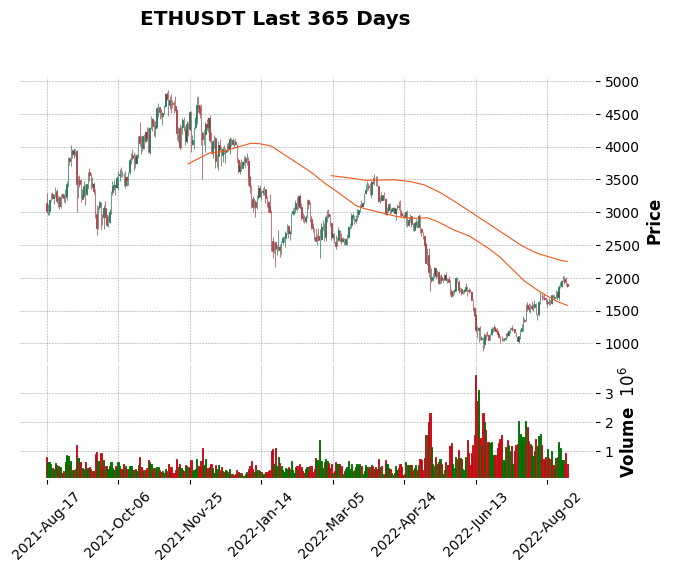

In [70]:
mpf.plot(hist_df.set_index('Close Time').tail(365), 
        type='candle', style='charles', 
        volume=True, 
        title='ETHUSDT Last 365 Days', 
        mav=(100, 200))

In [9]:
btc_historical = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1WEEK, '1 Jan 2011')

In [10]:
btc_historical_df = pd.DataFrame(btc_historical)

In [11]:
btc_historical_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [12]:
btc_historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Open Time           262 non-null    int64 
 1   Open                262 non-null    object
 2   High                262 non-null    object
 3   Low                 262 non-null    object
 4   Close               262 non-null    object
 5   Volume              262 non-null    object
 6   Close Time          262 non-null    int64 
 7   Quote Asset Volume  262 non-null    object
 8   Number of Trades    262 non-null    int64 
 9   TB Base Volume      262 non-null    object
 10  TB Quote Volume     262 non-null    object
 11  Ignore              262 non-null    object
dtypes: int64(3), object(9)
memory usage: 24.7+ KB


In [13]:
btc_historical_df['Open Time'] = pd.to_datetime(btc_historical_df['Open Time']/1000, unit='s')
btc_historical_df['Close Time'] = pd.to_datetime(btc_historical_df['Close Time']/1000, unit='s')

In [14]:
btc_historical_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2017-08-14,4261.48000000,4485.39000000,3850.00000000,4086.29000000,2843.43142600,2017-08-20 23:59:59.999000064,12021576.48265154,13134,2240.24924000,9482742.92094674,0
1,2017-08-21,4069.13000000,4453.91000000,3400.00000000,4310.01000000,4599.39662900,2017-08-27 23:59:59.999000064,18978983.50987317,37826,1755.53026500,7173180.19744751,0
2,2017-08-28,4310.01000000,4939.19000000,4124.54000000,4509.08000000,4753.84337600,2017-09-03 23:59:59.999000064,21581679.92866748,35717,1371.03442800,6237542.20612072,0
3,2017-09-04,4505.00000000,4788.59000000,3603.00000000,4130.37000000,6382.78774500,2017-09-10 23:59:59.999000064,27307824.36893929,42372,2821.42273900,12120979.77068529,0
4,2017-09-11,4153.62000000,4394.59000000,2817.00000000,3699.99000000,8106.70512700,2017-09-17 23:59:59.999000064,30026796.42861788,50423,3763.12845200,13956149.18844029,0


In [16]:
btc_historical_df[numeric_columns] = btc_historical_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [17]:
btc_historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           262 non-null    datetime64[ns]
 1   Open                262 non-null    float64       
 2   High                262 non-null    float64       
 3   Low                 262 non-null    float64       
 4   Close               262 non-null    float64       
 5   Volume              262 non-null    float64       
 6   Close Time          262 non-null    datetime64[ns]
 7   Quote Asset Volume  262 non-null    float64       
 8   Number of Trades    262 non-null    int64         
 9   TB Base Volume      262 non-null    float64       
 10  TB Quote Volume     262 non-null    float64       
 11  Ignore              262 non-null    object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 24.7+ KB


In [26]:
btc_historical_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,262.000000,262.000000,262.000000,262.000000,2.620000e+02,2.620000e+02,2.620000e+02,262.000000,2.620000e+02
mean,19414.573626,21002.712824,17735.330191,19486.961107,3.769091e+05,8.389880e+09,6.286927e+06,187472.351591,4.145681e+09
std,17366.583996,18600.640524,15846.715030,17342.938148,2.451079e+05,9.376742e+09,6.476514e+06,119696.644205,4.601618e+09
min,3229.220000,3557.750000,2817.000000,3228.670000,2.843431e+03,1.202158e+07,1.313400e+04,1371.034428,6.237542e+06
25%,7014.327500,7683.845000,6456.817500,7047.790000,2.340975e+05,1.898850e+09,1.726291e+06,119024.199356,9.546493e+08
50%,9982.225000,10794.515000,9215.500000,10085.780000,3.255251e+05,3.503932e+09,4.008143e+06,162018.713738,1.732986e+09
75%,34203.847500,36387.500000,29281.270000,34203.842500,4.682187e+05,1.333248e+10,8.805530e+06,234173.565078,6.534274e+09
max,65519.110000,69000.000000,62278.000000,65519.100000,1.386781e+06,5.386617e+10,4.331179e+07,672735.926950,2.591937e+10


In [19]:
btc_historical_df.set_index('Close Time').tail(10)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2022-06-19 23:59:59.999000064,2022-06-13,26574.53,26895.84,17622.00,20574.00,1.153718e+06,2.471845e+10,16153967,566051.074843,1.211946e+10,0
2022-06-26 23:59:59.999000064,2022-06-20,20574.00,21888.00,19637.03,21038.07,5.708012e+05,1.187015e+10,8827163,283739.016920,5.901368e+09,0
2022-07-03 23:59:59.999000064,2022-06-27,21038.08,21539.85,18626.00,19315.83,5.085441e+05,1.010746e+10,8098167,251218.840670,4.992634e+09,0
2022-07-10 23:59:59.999000064,2022-07-04,19315.83,22527.37,19055.31,20862.47,1.111997e+06,2.354096e+10,17338062,557807.344070,1.180818e+10,0
2022-07-17 23:59:59.999000064,2022-07-11,20861.11,21684.54,18910.94,20798.16,1.043686e+06,2.122566e+10,28620637,518342.144540,1.054600e+10,0
2022-07-24 23:59:59.999000064,2022-07-18,20799.58,24276.74,20762.45,22579.68,1.336219e+06,3.041951e+10,36404041,672735.926950,1.531432e+10,0
2022-07-31 23:59:59.999000064,2022-07-25,22577.13,24668.00,20706.50,23293.32,1.282264e+06,2.921584e+10,36815045,639746.882790,1.458326e+10,0
2022-08-07 23:59:59.999000064,2022-08-01,23296.36,23647.68,22400.00,23174.39,9.511404e+05,2.194315e+10,32042944,472484.292340,1.090234e+10,0
2022-08-14 23:59:59.999000064,2022-08-08,23174.39,25047.56,22664.69,24305.24,1.251083e+06,3.007762e+10,43311786,625522.697680,1.503944e+10,0


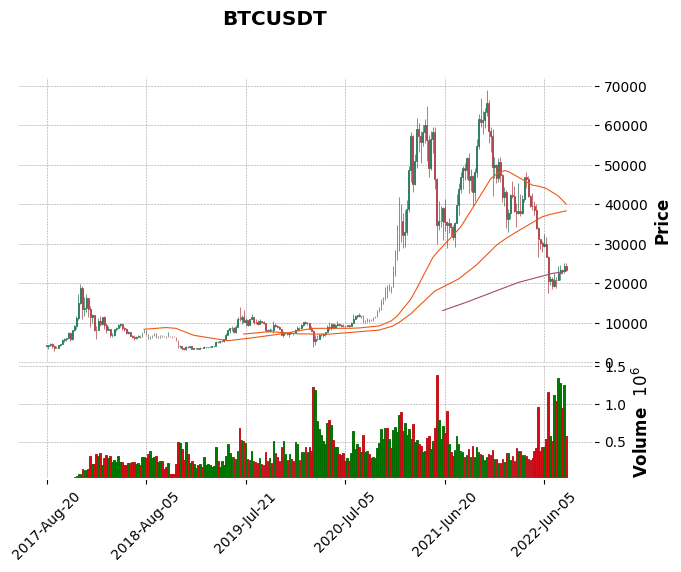

In [25]:
mpf.plot(btc_historical_df.set_index('Close Time').tail(10000), 
        type='candle', style='charles', 
        volume=True, 
        title='BTCUSDT', 
        mav=(50, 100, 200))